<a href="https://colab.research.google.com/github/Anna-Lisichka/modul_20_Diploma/blob/main/4_beautiful_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. это четвертый файл с кодом для моей дипломной работы.\
Мне очень хотелось сделать что-то действительно красивое на последок. То, что приятно будет посмотреть и вам. Кроме этого, построение этих графиков основано на комбинации библиотек.

**Подготовка данных для графиков и диаграмм**

In [ ]:
import pandas as pd

# Ссылка на DataFrame  файла на GitHub
url = 'https://raw.githubusercontent.com/Anna-Lisichka/modul_20_Diploma/main/shopping_data.xlsx'

# Загрузка данных из файла
data = pd.read_excel(url, engine='openpyxl')

# Проверка первых нескольких строк данных
data.head()

,IDПокупателя,Дата регистрации,Возраст,Пол,Товар,Категория,Сумма,Расположение,Размер,Цвет,Сезон,Статус подписки,Способ оплаты,Тип отправки,Скидка,Промокод,Количество покупок,Частота покупок
0,1,2024-07-05,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,14,Fortnightly
1,2,2024-07-05,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,2,Fortnightly
2,3,2024-07-05,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,23,Weekly
3,4,2024-07-05,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,49,Weekly
4,5,2024-07-05,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,Yes,Cash,Free Shipping,Yes,Yes,31,Annually


1. Для библиотеки **Matplotlib** одним из красивых графиков может быть "Тепловая карта". Данный график используется совместно с библиотекой **Seaborn**

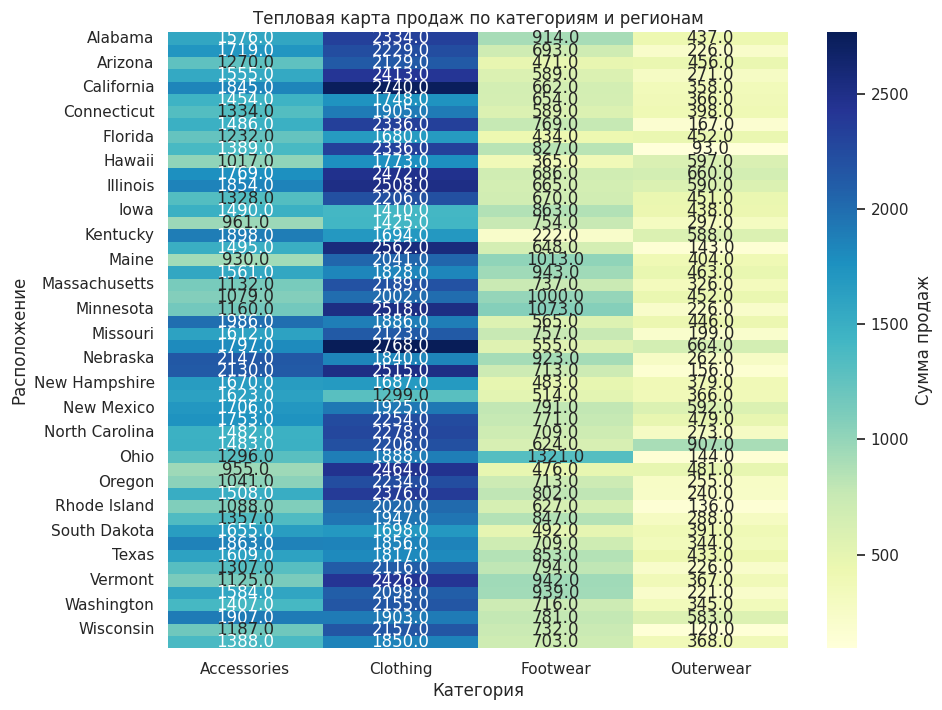

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_table = data.pivot_table(values='Сумма', index='Расположение', columns='Категория', aggfunc='sum', fill_value=0)

# Настройка визуализации
plt.figure(figsize=(10, 8))  # Размер графика
sns.set(style="whitegrid")   # Стиль графика

# Строим тепловую карту
ax = sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Сумма продаж'})

# Добавляем заголовок
plt.title('Тепловая карта продаж по категориям и регионам')

# Показываем график
plt.show()

2. Для библиотеки **Seaborn** одним из красивых и информативных графиков который можно построить на основе набора данных о продажах магазина, является коробчатая диаграмма (Box Plot). Данный график используется совместно с библиотекой **Matplotlib**

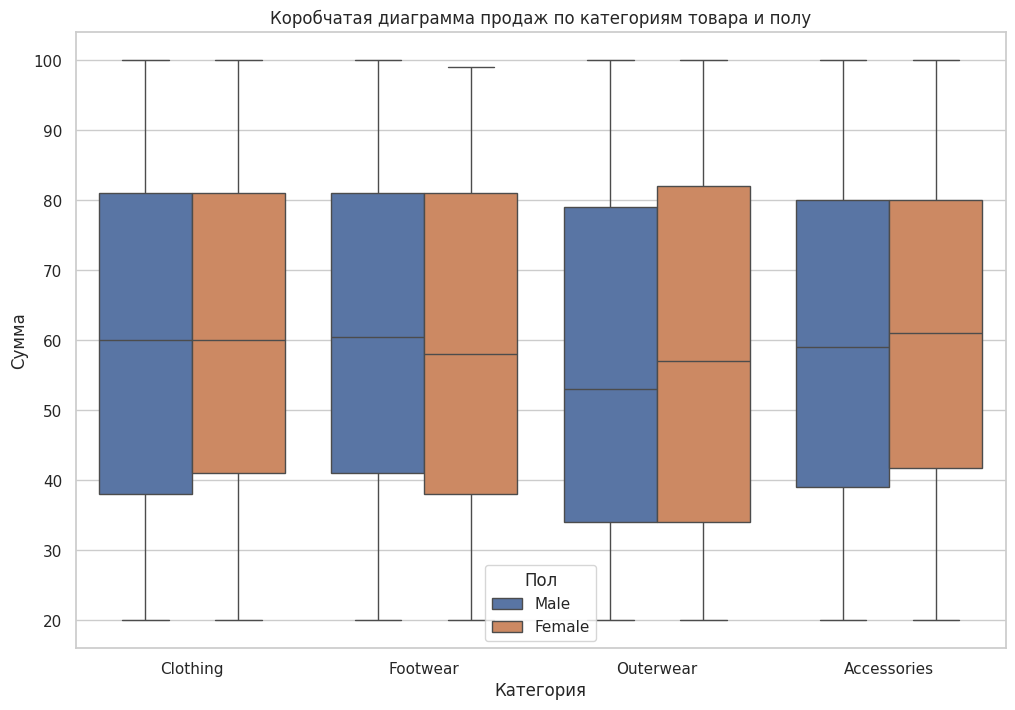

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка визуализации
plt.figure(figsize=(12, 8))  # Размер графика

# Строим коробчатую диаграмму с использованием Seaborn
sns.set(style="whitegrid")  # Стиль графика
sns.boxplot(x='Категория', y='Сумма', hue='Пол', data=data)

# Добавляем заголовок
plt.title('Коробчатая диаграмма продаж по категориям товара и полу')

# Показываем график
plt.show()


3. Для библиотеки **Plotly** одним из самых красивых и интерактивных графиков, который можно построить на наборе данных о продажах магазина является график с пузырьками

In [ ]:
import plotly.express as px

# Строим анимированный график с пузырьками
fig = px.scatter(data,
                 x='Категория',  # Категории товара по оси X
                 y='Сумма',      # Сумма продаж по оси Y
                 size='Сумма',   # Размер пузырьков по сумме продаж
                 color='Частота покупок',  # Цвет пузырьков по частоте покупок
                 animation_frame='Сезон',  # Анимация по сезонам
                 animation_group='Категория',  # Группировка анимации по категориям товара
                 title='Анимация продаж с пузырьками по категориям товара и регионам')

# Показываем интерактивный график с пузырьками
fig.show()